In [28]:
# importing libraries
import os
from pathlib import Path
import pandas as pd 
import seaborn as sns
import urllib
import json
import zipfile
from zipfile import ZipFile
from openpyxl import Workbook
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [29]:
# clear folder from previous exercises leaving only trip data zip file
dir_name = r"C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data"
folder = os.listdir(dir_name)

for item in folder:
    if item.endswith(".csv") or item.endswith(".txt"):
        os.remove(os.path.join(dir_name, item))

In [30]:
# assign path to data folder
data_path = r"C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data"

# file name to download
file = "OpenDataDC_Taxi_2023.zip"

# establish file path
fullfilename = os.path.join(data_path, file)

# assign ZIP file to variable
items = zipfile.ZipFile(fullfilename)

# show files in ZIP
print(items.namelist())

# opening ZIP file in read mode
with zipfile.ZipFile(fullfilename, "r") as file:

    # extract all files inside the ZIP file
    file.extractall(data_path)

['README_DC_Taxicab_trip.txt', 'taxi_202301.csv', 'taxi_202302.csv', 'taxi_202303.csv', 'taxi_202304.csv', 'taxi_202305.csv', 'taxi_202306.csv', 'taxi_202307.csv', 'taxi_202308.csv', 'taxi_202309.csv', 'taxi_202310.csv', 'taxi_202311.csv', 'taxi_202312.csv']


In [31]:
# load monthly files into a single df and visualize process using glob library
## data types indicated to improve performance and columns selected to consolidate df
import glob

import glob
all_dfs = []
for one_filename in glob.glob(r'C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi*.csv'):
    print(f'Loading {one_filename}')
    new_df= pd.read_csv(one_filename,
                 usecols=['OBJECTID', 'ORIGINDATETIME_TR', 'DESTINATIONDATETIME_TR', 'ORIGINZIP', 'DESTINATIONZIP', 'MILEAGE', 'DURATION', 'FAREAMOUNT', 'ORIGIN_BLOCK_LATITUDE', 'ORIGIN_BLOCK_LONGITUDE', 'ORIGINZIP']) 
    all_dfs.append(new_df)

len(all_dfs)

Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_202301.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_202302.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_202303.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_202304.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_202305.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_202306.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents

12

In [32]:
# combine multiple dataframes into one and preview data
taxi_trips = pd.concat(all_dfs)

rows, columns = taxi_trips.shape
print('rows: {:,}\ncolumns: {}'.format(rows, columns))

taxi_trips

rows: 3,092,555
columns: 10


,OBJECTID,FAREAMOUNT,ORIGINZIP,DESTINATIONZIP,MILEAGE,DURATION,ORIGIN_BLOCK_LATITUDE,ORIGIN_BLOCK_LONGITUDE,ORIGINDATETIME_TR,DESTINATIONDATETIME_TR
0,1,15.79,2DA,22202,5.76000,852.0,38.896733,-77.009058,01/01/2023 00:00,01/01/2023 00:00
1,2,10.81,20011,20011,3.11000,650.0,38.952536,-77.003107,01/01/2023 00:00,01/01/2023 00:00
2,3,13.51,20001,20007,4.80000,539.0,NaN,NaN,01/01/2023 00:00,01/01/2023 00:00
3,4,12.97,20005,20024,2.68000,1187.0,38.901925,-77.033638,01/01/2023 00:00,01/01/2023 00:00
4,5,16.48,20001,20002,5.76000,876.0,NaN,NaN,01/01/2023 00:00,01/01/2023 00:00
...,...,...,...,...,...,...,...,...,...,...
199303,199304,40.24,20004,20011,9.63000,3024.0,38.895463,-77.021917,12/31/2023 23:00,01/01/2024 00:00
199304,199305,10.00,20002,20002,0.00000,106.0,38.901547,-76.979938,12/31/2023 23:00,12/31/2023 23:00
199305,199306,12.47,20002,20037,2.73000,1078.0,38.897204,-77.008388,12/31/2023 23:00,12/31/2023 23:00
199306,199307,15.67,20002,20010,3.54000,1269.0,38.897204,-77.008388,12/31/2023 23:00,01/01/2024 00:00


In [33]:
# find missing values, shown as percentage
print((taxi_trips.isnull().sum()/len(taxi_trips.index))*100)

OBJECTID                   0.000000
FAREAMOUNT                 7.336038
ORIGINZIP                  0.000000
DESTINATIONZIP             0.000000
MILEAGE                    0.000000
DURATION                   0.000776
ORIGIN_BLOCK_LATITUDE     16.198063
ORIGIN_BLOCK_LONGITUDE    16.198063
ORIGINDATETIME_TR          0.000000
DESTINATIONDATETIME_TR     0.000000
dtype: float64


In [34]:
# drop records with NA values for columns that will be used for analysis
taxi_trips.dropna(subset=['ORIGIN_BLOCK_LATITUDE', 'ORIGIN_BLOCK_LONGITUDE'], inplace=True)

In [35]:
# confirm rows with missing values were dropped
print((taxi_trips.isnull().sum()/len(taxi_trips.index))*100)

OBJECTID                  0.000000
FAREAMOUNT                7.613613
ORIGINZIP                 0.000000
DESTINATIONZIP            0.000000
MILEAGE                   0.000000
DURATION                  0.000887
ORIGIN_BLOCK_LATITUDE     0.000000
ORIGIN_BLOCK_LONGITUDE    0.000000
ORIGINDATETIME_TR         0.000000
DESTINATIONDATETIME_TR    0.000000
dtype: float64


In [37]:
# convert pickup timestamp to datetime column and add month and hour columns
taxi_trips['pickup_dt'] = pd.to_datetime(taxi_trips['ORIGINDATETIME_TR']) 

taxi_trips.dtypes

OBJECTID                           int64
FAREAMOUNT                       float64
ORIGINZIP                         object
DESTINATIONZIP                    object
MILEAGE                          float64
DURATION                         float64
ORIGIN_BLOCK_LATITUDE            float64
ORIGIN_BLOCK_LONGITUDE           float64
ORIGINDATETIME_TR                 object
DESTINATIONDATETIME_TR            object
pickup_dt                 datetime64[ns]
month                              int32
dtype: object

In [38]:
# transform pickup timestamp column for temporal analysis
## convert UTC date time column to local time zone
taxi_trips['pickup_est'] = taxi_trips['pickup_dt'].dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
## extract hour, weekday name, and weekday number in local time zone
taxi_trips['hour'] = pd.DatetimeIndex(taxi_trips['pickup_est']).hour
taxi_trips['weekday_name'] = pd.DatetimeIndex(taxi_trips['pickup_est']).day_name()
taxi_trips['weekday_num'] = taxi_trips['pickup_est'].dt.dayofweek
taxi_trips['month'] = pd.DatetimeIndex(taxi_trips['pickup_est']).month 

taxi_trips.head()

,OBJECTID,FAREAMOUNT,ORIGINZIP,DESTINATIONZIP,MILEAGE,DURATION,ORIGIN_BLOCK_LATITUDE,ORIGIN_BLOCK_LONGITUDE,ORIGINDATETIME_TR,DESTINATIONDATETIME_TR,pickup_dt,month,pickup_est,hour,weekday_name,weekday_num
0,1,15.79,2DA,22202,5.760000,852.0,38.896733,-77.009058,01/01/2023 00:00,01/01/2023 00:00,2023-01-01,12,2022-12-31 19:00:00-05:00,19,Saturday,5
1,2,10.81,20011,20011,3.110000,650.0,38.952536,-77.003107,01/01/2023 00:00,01/01/2023 00:00,2023-01-01,12,2022-12-31 19:00:00-05:00,19,Saturday,5
3,4,12.97,20005,20024,2.680000,1187.0,38.901925,-77.033638,01/01/2023 00:00,01/01/2023 00:00,2023-01-01,12,2022-12-31 19:00:00-05:00,19,Saturday,5
5,6,5.14,20008,20036,0.540000,254.0,38.917417,-77.048261,01/01/2023 00:00,01/01/2023 00:00,2023-01-01,12,2022-12-31 19:00:00-05:00,19,Saturday,5
6,7,NaN,20003,20002,2.161737,14.0,38.876481,-77.002497,01/01/2023 00:00,01/01/2023 00:00,2023-01-01,12,2022-12-31 19:00:00-05:00,19,Saturday,5


In [ ]:
# select single month to reduce geoprocessing
trips_by_month = (
    taxi_trips[taxi_trips['month'].isin([10])]
    .reset_index() 
    ) 

# selects trips of 30 or more miles
long_trips_by_month = (
    trips_by_month[trips_by_month['MILEAGE'] >= 30] 
    .reset_index()
    )

# create points column from lat/lon
points = gpd.GeoDataFrame(
    long_trips_by_month, geometry=gpd.points_from_xy(long_trips_by_month.ORIGIN_BLOCK_LONGITUDE, long_trips_by_month.ORIGIN_BLOCK_LATITUDE), crs="EPSG:4326"
)

print(points.head())

   level_0  index  OBJECTID  FAREAMOUNT ORIGINZIP DESTINATIONZIP    MILEAGE  \
0      719    883       884       76.90     1D             21045  33.550000   
1      735    902       903      117.73     20024          20024  46.530000   
2      943   1120      1121       76.69     20009          22026  33.110000   
3      973   1150      1151         NaN     20005          21231  37.053134   
4     1027   1206      1207       75.88     20037          21076  33.330000   

   DURATION  ORIGIN_BLOCK_LATITUDE  ORIGIN_BLOCK_LONGITUDE ORIGINDATETIME_TR  \
0    2707.0              38.886039              -77.018731  10/01/2023 03:00   
1    7627.0              38.879895              -77.025367  10/01/2023 03:00   
2    2881.0              38.914462              -77.031953  10/01/2023 05:00   
3      71.0              38.904572              -77.028851  10/01/2023 05:00   
4    2820.0              38.909637              -77.047716  10/01/2023 06:00   

  DESTINATIONDATETIME_TR           pickup_dt

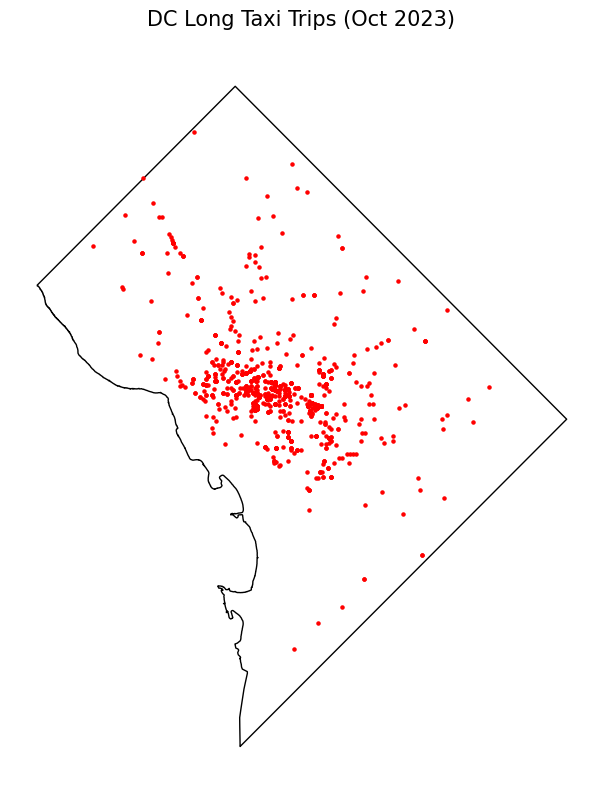

In [ ]:
# map long trips from January 2023
fig, ax = plt.subplots(figsize=(8, 8))

## plot DC boundary
url = 'https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Administrative_Other_Boundaries_WebMercator/MapServer/10/query?outFields=*&where=1%3D1&f=geojson'

boundary =  gpd.read_file(url)

ax = boundary.plot(
    ax=ax, 
    color="white", 
    edgecolor="black"
)

## plot trip points
points.plot(
    ax=ax, 
    color="red", 
    markersize = 5
).set_title(
    'DC Long Taxi Trips (Oct 2023)',
    pad=20,
    fontsize=15
)
ax.axis('off')

plt.tight_layout()

In [ ]:
taxi_trips.head()

,OBJECTID,FAREAMOUNT,ORIGINZIP,DESTINATIONZIP,MILEAGE,DURATION,ORIGIN_BLOCK_LATITUDE,ORIGIN_BLOCK_LONGITUDE,ORIGINDATETIME_TR,DESTINATIONDATETIME_TR,pickup_dt,month
0,1,15.79,2DA,22202,5.760000,852.0,38.896733,-77.009058,01/01/2023 00:00,01/01/2023 00:00,2023-01-01,1
1,2,10.81,20011,20011,3.110000,650.0,38.952536,-77.003107,01/01/2023 00:00,01/01/2023 00:00,2023-01-01,1
3,4,12.97,20005,20024,2.680000,1187.0,38.901925,-77.033638,01/01/2023 00:00,01/01/2023 00:00,2023-01-01,1
5,6,5.14,20008,20036,0.540000,254.0,38.917417,-77.048261,01/01/2023 00:00,01/01/2023 00:00,2023-01-01,1
6,7,NaN,20003,20002,2.161737,14.0,38.876481,-77.002497,01/01/2023 00:00,01/01/2023 00:00,2023-01-01,1


In [ ]:
# map late night trips 

# isolate late-night taxi trips  remove null mileage trips and longer trips over 20 miles
latenight_trips= taxi_trips[taxi_trips['hour'].isin([23, 0, 1, 2, 3]) & (taxi_trips['MILEAGE'] != 0) & (taxi_trips['MILEAGE'] <= 20)]

# get total number of late-night trips per zip code
latenight_trips_hourlytotal = latenight_trips.groupby(['ORIGINZIP']).size() \
    .reset_index() \
    .rename(columns = {0: 'Trip Count'}) 

latenight_trips_hourlytotal.head(500)

KeyError: 'hour'